In [1]:
#Importing the python packages 
import numpy as np
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pylab as plt
%matplotlib inline

#Modules for feature extraction supported by Machine learning and for splitting datasets into random test and train subsets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#NLP Packages
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer

#Machine Learning packages
from nltk.classify import NaiveBayesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Loading the dataset Hotel Reviews

In [2]:
data_hotel_reviews = pd.read_csv("Hotel_Reviews.csv")

# To view the Top 30 records in the dataset

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data_hotel_reviews.head(30)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


# To get the column names of the of the dataset

In [3]:
for col in data_hotel_reviews.columns:
    print(col)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


# Removing the duplicate values from the dataset

In [125]:
print(sum(data_hotel_reviews.duplicated()))

526


In [85]:
data_hotel_reviews.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [128]:
data_hotel_reviews=data_hotel_reviews.drop_duplicates()
data_hotel_reviews.shape

(515212, 23)

# Exploratory Data Analysis

# To get the unique hotel names from the dataset

In [6]:
len(data_hotel_reviews.Hotel_Name.unique())

1492

# To view some basic statistical details of the dataset

In [7]:
data_hotel_reviews.Reviewer_Nationality.describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

# To view the Top 30 reviewer nationalities 

In [105]:
Reviewer_Nat_Count = data_hotel_reviews.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:30])

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
 India                          3437
 Greece                         3406
 China                          3400
 Sweden                         3368
 New Zealand                    3237
 Singapore                      3091
 Hong Kong                      3013
 

In [129]:
data_hotel_reviews.Hotel_Name.describe()

count                                         515212
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

In [99]:

Number_of_Leisure_Hotels = data_hotel_reviews[data_hotel_reviews['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Leisure Hotels: ", len(Number_of_Leisure_Hotels))

Number_of_Business_Hotels = data_hotel_reviews[data_hotel_reviews['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Business Hotels: ", len(Number_of_Business_Hotels))

Leisure Hotels:  1492
Business Hotels:  1488


# Plot of the Count of the reviews vs the Average review score 

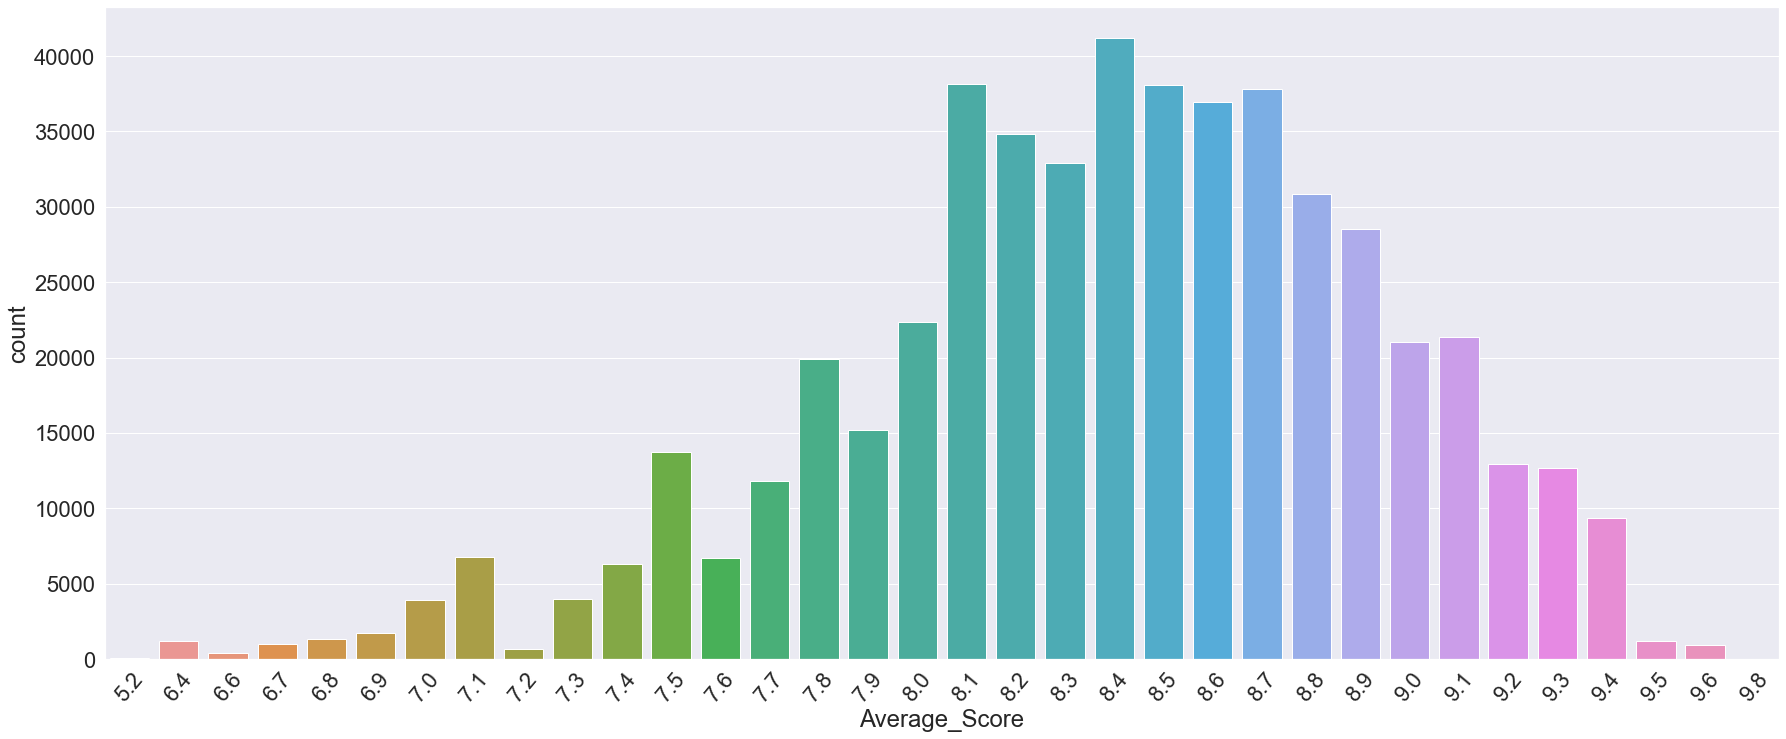

In [7]:
data_hotel_reviews_plot = data_hotel_reviews[["Hotel_Name","Average_Score"]].drop_duplicates() 
sns.set(font_scale=2)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=50)
sns.countplot(ax = ax,x = "Average_Score",data=data_hotel_reviews)

# To get the nationality of the reviewer and ploting a wordcloud of the nationality

In [113]:
text = " "
for i in range(data_hotel_reviews.shape[0]):
    text = " ".join([text,data_hotel_reviews["Reviewer_Nationality"].values[i]])

KeyboardInterrupt: 

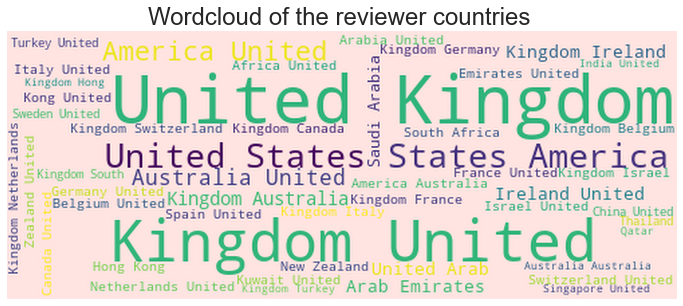

In [117]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='mistyrose', width = 500,\
                      height=200, max_font_size=50, max_words=50).generate(text)
wordcloud.recolor(random_state=312)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='lanczos')#interpolation of the image lanczos for a better quality image
plt.title("Wordcloud of the reviewer countries ")
plt.axis("off")
plt.show()

# Statistics of the Review Date column 

In [13]:
data_hotel_reviews.Review_Date.describe()

count       515738
unique         731
top       8/2/2017
freq          2585
Name: Review_Date, dtype: object

# Plot of the count of the reviews vs the dates for Top 20 highest review received dates

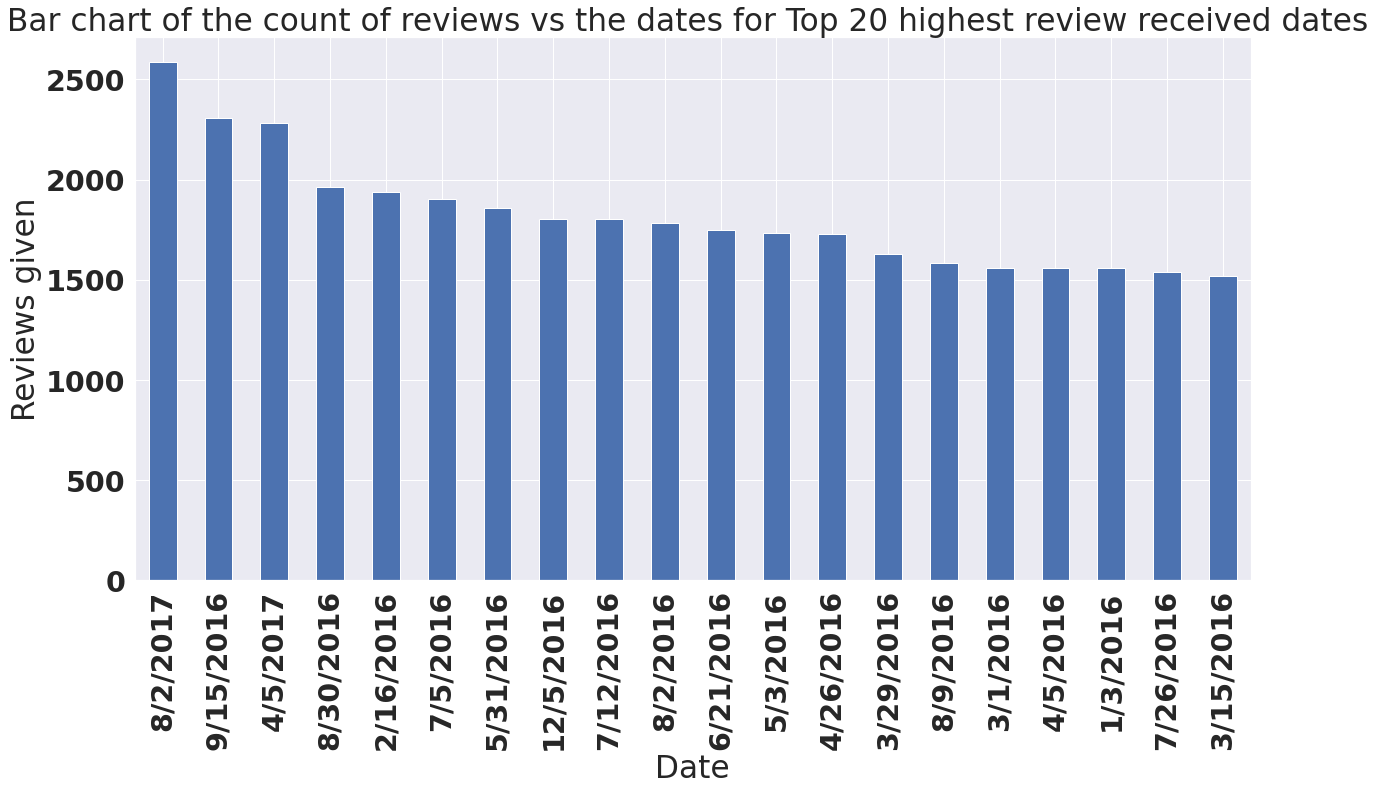

In [41]:
Review_Date_count = data_hotel_reviews.Review_Date.value_counts()
plt.figure(figsize=(20,10))
plt.title("Bar chart of the count of reviews vs the dates for Top 20 highest review received dates ")
plt.xlabel("Date")
plt.ylabel("Reviews given")
Review_Date_count[:20].plot(kind='bar')


# Total number of countries which have given reviews

In [155]:
countries_reviews = data_hotel_reviews.Reviewer_Nationality.unique()
distinctCountries_reviews = len(countries_reviews)
print("Total number of countries from which reviews have been made :", distinctCountries_reviews)

Total number of countries from which reviews have been made : 227


# Top reviewer countries and the percentage of contribution to the dataset

In [72]:
Length = len(data_hotel_reviews.Reviewer_Nationality)
percentage_of_users_visiting= (data_hotel_reviews.Reviewer_Nationality.value_counts()*100/Length).sort_values(ascending=False)
percentage_of_users_visiting

 United Kingdom               47.552439
 United States of America      6.871124
 Australia                     4.204848
 Ireland                       2.874909
 United Arab Emirates          1.984535
                                ...    
 Guinea                        0.000194
 Northern Mariana Islands      0.000194
 Comoros                       0.000194
 Palau                         0.000194
 Anguilla                      0.000194
Name: Reviewer_Nationality, Length: 227, dtype: float64

# Visitor ratio(Percentage of people visiting Europe's Hotels vs the Countries)

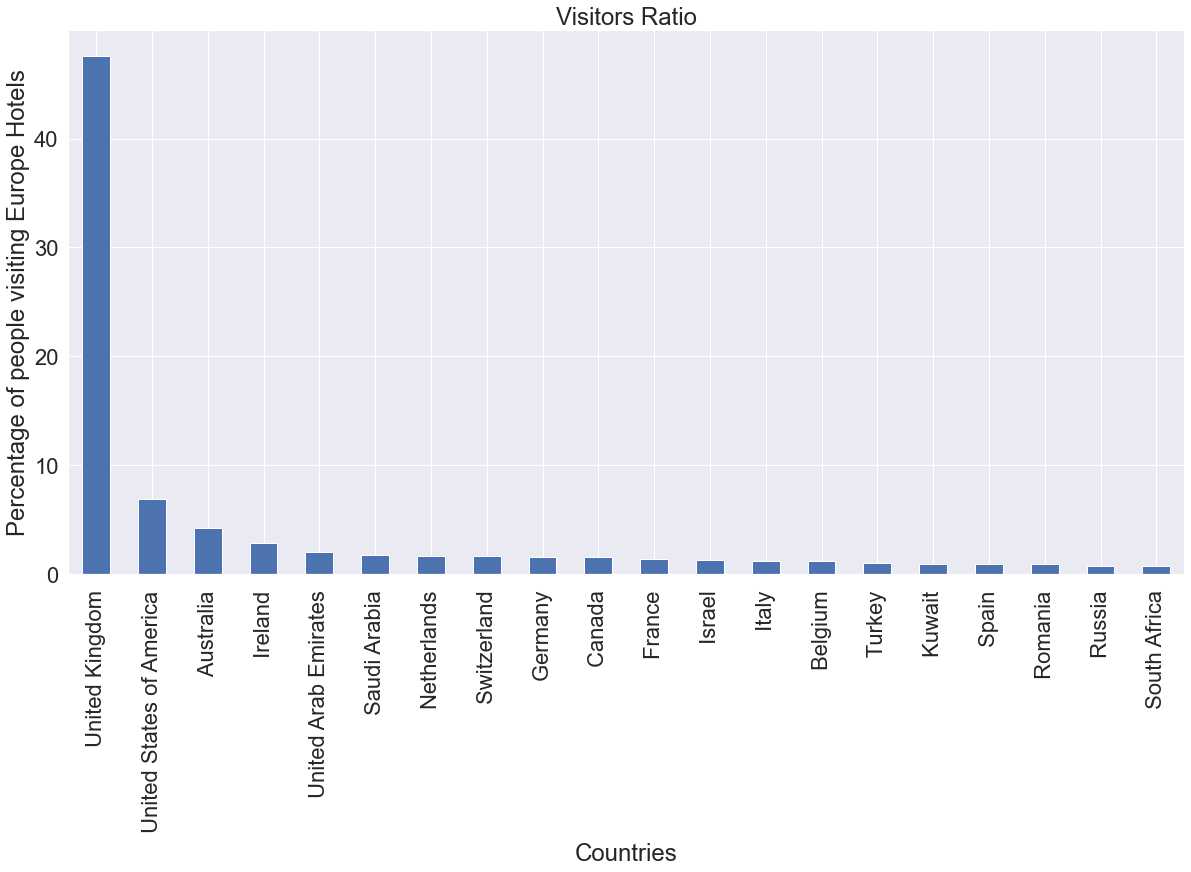

In [73]:
from matplotlib import pyplot as plt
plt.xlabel('Countries')
plt.ylabel('Percentage of people visiting Europe Hotels')
plt.title('Visitors Ratio')
percentage_of_users_visiting.head(20).plot(kind='bar',figsize=(20,10))
plt.show()


# Count of the reviews given vs Total number of reviews user has given 

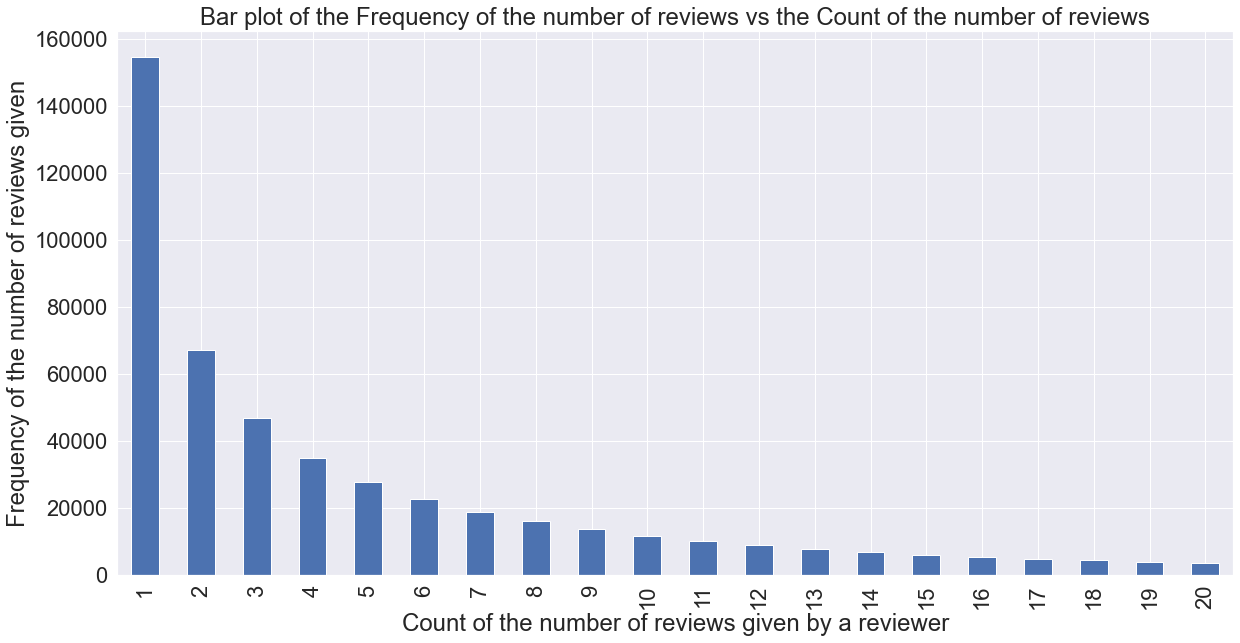

In [70]:
Reviewers_freq = data_hotel_reviews.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()
plt.figure(figsize=(20,10))
plt.title("Bar plot of the Frequency of the number of reviews vs the Count of the number of reviews")
plt.xlabel("Count of the number of reviews given by a reviewer")
plt.ylabel("Frequency of the number of reviews given")
Reviewers_freq[0:20].plot(kind='bar')


# Minimum, maximum and the mean ratings givne to the Hotel

In [68]:
min_rating = data_hotel_reviews.Average_Score.min() 
max_rating = data_hotel_reviews.Average_Score.max()
mean_rating=data_hotel_reviews.Average_Score.mean()
print('The hotel ratings are between '+ str(min_rating) +" "+'and'+" "+str(max_rating)+" "+'with a mean of'+" "+
      str(round(mean_rating,2)))

The hotel ratings are between 5.2 and 9.8 with a mean of 8.4


In [69]:
data_hotel_reviews['Average_Score'].corr(data_hotel_reviews['Reviewer_Score'])

0.36435082685489584

# Correlation plot of all the columns in the dataset

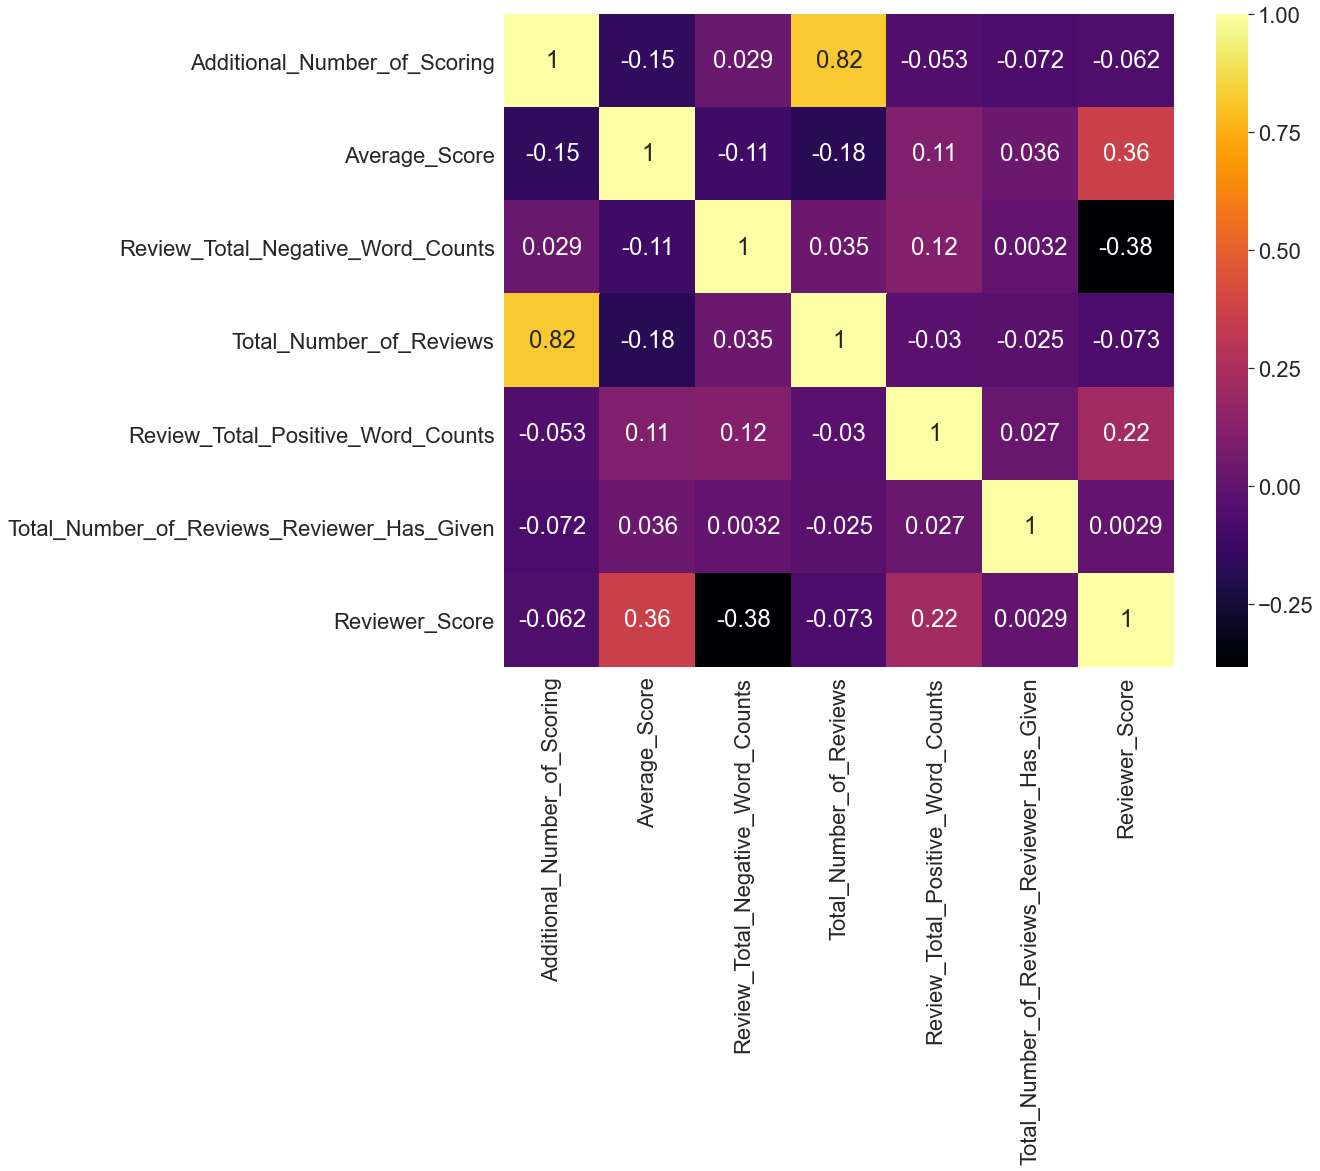

In [21]:
correlation=data_hotel_reviews[['Additional_Number_of_Scoring','Average_Score','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score']]
corr_reviews=correlation.corr()
f,ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr_reviews, cmap='inferno', annot=True)

# Extraction of specific columns from the dataset

In [22]:
review_data_hotel_reviews = data_hotel_reviews[['Hotel_Name', 'Positive_Review', 'Negative_Review', 'Average_Score', 'Reviewer_Score']].copy()
review_data_hotel_reviews.head()

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7


# Concatination of postive and negative reviews

In [23]:
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['Positive_Review'].astype(str) + review_data_hotel_reviews['Negative_Review'].astype(str)

In [19]:
for i in review_data_hotel_reviews.columns:
    print(i)

Hotel_Name
Positive_Review
Negative_Review
Average_Score
Reviewer_Score
review_text


In [108]:
review_data_hotel_reviews.head()

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,Only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,No real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,Location was good and staff were ok It is cut...
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,Great location in nice surroundings the bar a...
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,Amazing location and building Romantic settin...


# Bar plot of the number of reviews vs the reviewer score

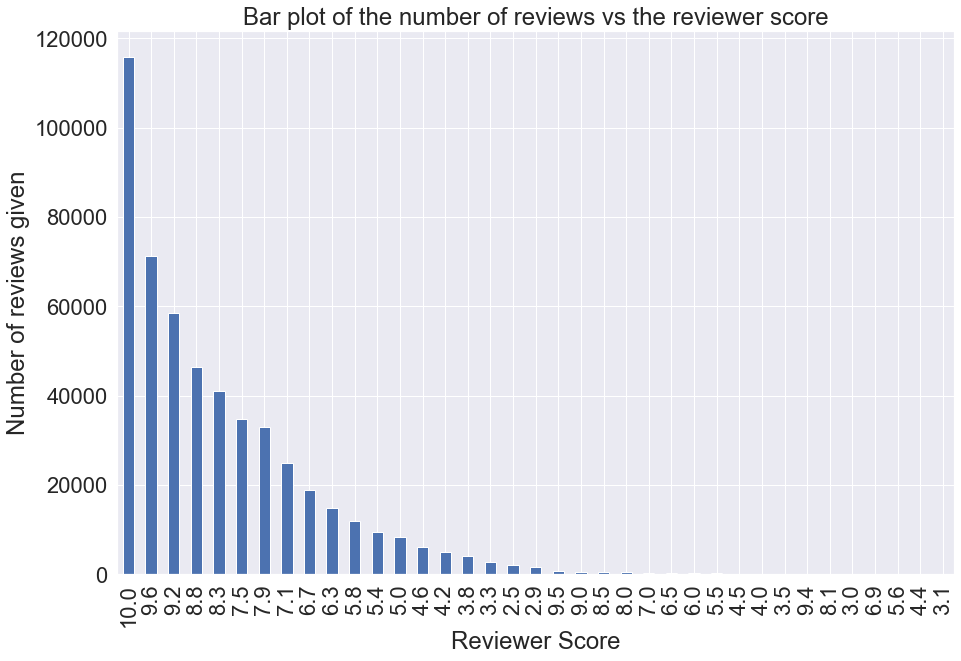

In [24]:
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].fillna('')
review_data_hotel_reviews.Reviewer_Score.value_counts()
plt.title("Bar plot of the number of reviews vs the reviewer score")
plt.xlabel("Reviewer Score")
plt.ylabel("Number of reviews given")
review_data_hotel_reviews.Reviewer_Score.value_counts().plot(kind='bar',figsize=(15,10))

# Pie Chart of the Visitor Ratio

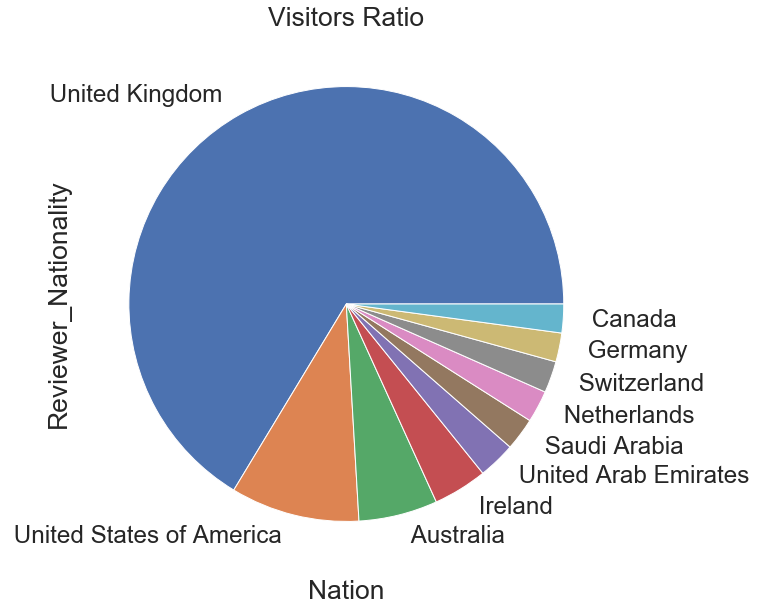

In [24]:
Length = len(data_hotel_reviews.Reviewer_Nationality)
result=(data_hotel_reviews.Reviewer_Nationality.value_counts()*100/Length).sort_values(ascending=False)
result
plt.xlabel('Nation')
plt.ylabel('Percentage of people visiting')
plt.title('Visitors Ratio')
result.head(10).plot(kind='pie',figsize=(20,10))
plt.show()

# 30 worst hotels

In [89]:
TOP_hotel_Names = (data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].sum()/data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].count()).sort_values(ascending=True).head(10)
TOP_hotel_Names

Hotel_Name
Hotel Liberty                               5.121538
Kube Hotel Ice Bar                          5.852632
Villa Eugenie                               5.864516
Savoy Hotel Amsterdam                       6.009465
Holiday Inn Paris Montparnasse Pasteur      6.329730
Best Western Maitrise Hotel Edgware Road    6.375000
Ibis Styles Milano Palmanova                6.383333
Villa Lut ce Port Royal                     6.385106
Hotel Cavendish                             6.442065
The Tophams Hotel                           6.480000
Name: Reviewer_Score, dtype: float64

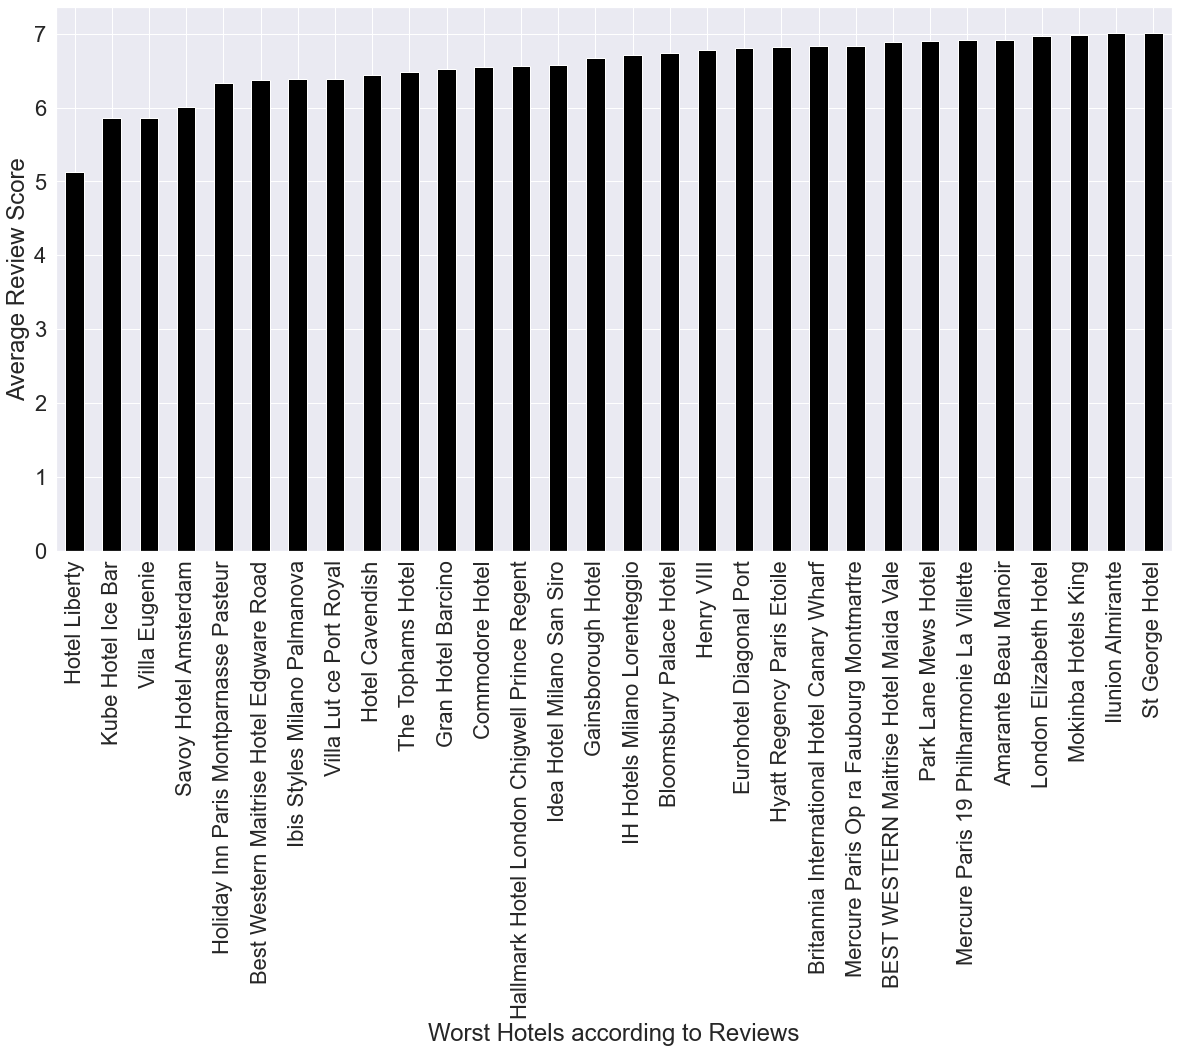

In [25]:

worst_hotels =data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(30)
worst_hotels.plot(kind="bar",color="black",figsize=(20,10))
plt.xlabel('Worst Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.rcParams.update({'font.size': 30})
plt.show()

In [88]:
TOP_hotel_Names = (data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].sum()/data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].count()).sort_values(ascending=False).head(10)
TOP_hotel_Names

Hotel_Name
Ritz Paris                             9.725000
Hotel Casa Camper                      9.718937
41                                     9.711650
H tel de La Tamise Esprit de France    9.688525
Le Narcisse Blanc Spa                  9.671930
H10 Casa Mimosa 4 Sup                  9.660345
Hotel Eiffel Blomet                    9.646667
Hotel The Serras                       9.623474
45 Park Lane Dorchester Collection     9.603571
The Soho Hotel                         9.597452
Name: Reviewer_Score, dtype: float64

# Top 30 best hotels

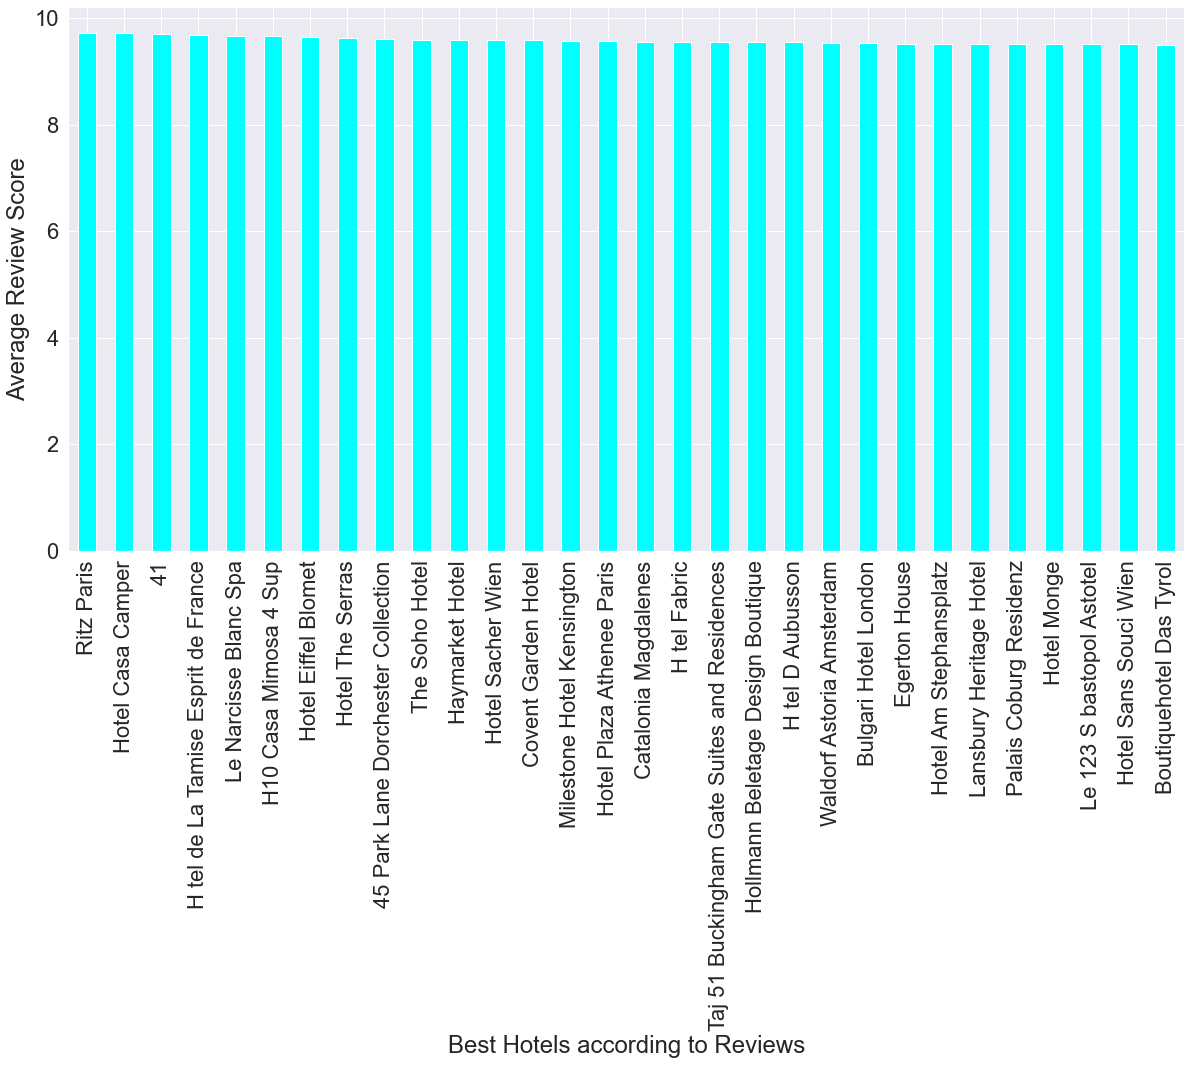

In [26]:
 
best_hotels = data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(30)
best_hotels.plot(kind="bar",color = "Cyan",figsize=(20,10))
plt.xlabel('Best Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.rcParams.update({'font.size': 30})
plt.show()

In [27]:
TOP_3_hotel_names_df = ['Ritz Paris','Hotel Casa Camper','41']

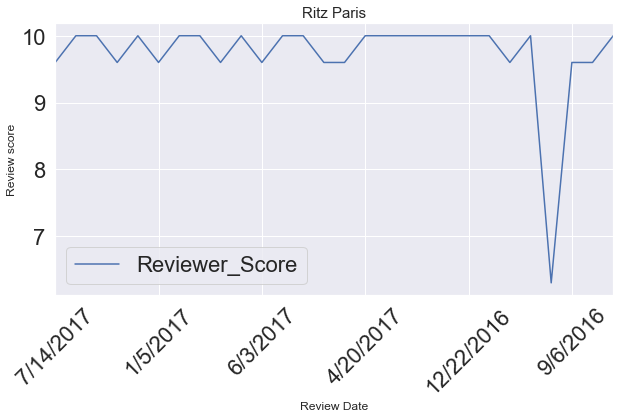

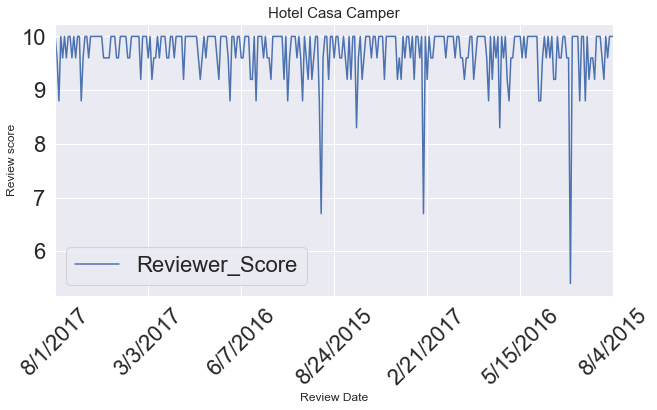

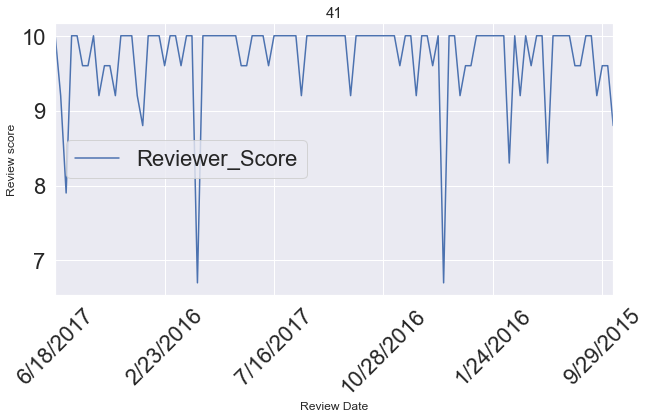

In [31]:
for hotelnames in TOP_3_hotel_names_df:
    hotelreviewtime = data_hotel_reviews[data_hotel_reviews.Hotel_Name == hotelnames]
    hotelreviewtime.plot('Review_Date', 'Reviewer_Score',figsize=(10,5))
    plt.xlabel('Review Date', fontsize=12)
    plt.ylabel('Review score', fontsize=12)
    title_str = hotelnames
    plt.xticks(rotation=45)
    plt.title(title_str, fontsize=15)
    plt.show()

# Pre-processsing of the dataset

In [112]:
review_data_hotel_reviews

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text,STOPWORDS,NUMERICS,HASHTAGS
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,Only the park outside of the hotel was beauti...,201,11,0
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,No real complaints the hotel was great great ...,39,0,0
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,Location was good and staff were ok It is cut...,23,0,0
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,Great location in nice surroundings the bar a...,102,0,0
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,Amazing location and building Romantic settin...,70,0,0
...,...,...,...,...,...,...,...,...,...
515733,Atlantis Hotel Vienna,location,no trolly or staff to help you take the lugga...,8.1,7.0,location no trolly or staff to help you take ...,7,0,0
515734,Atlantis Hotel Vienna,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,8.1,5.8,Breakfast was ok and we got earlier check in ...,6,2,0
515735,Atlantis Hotel Vienna,No Positive,The ac was useless It was a hot week in vienn...,8.1,2.5,No Positive The ac was useless It was a hot we...,8,0,0
515736,Atlantis Hotel Vienna,The rooms are enormous and really comfortable...,No Negative,8.1,8.8,The rooms are enormous and really comfortable...,10,1,0


# Downloading the english stopwords

In [ ]:
nltk.download('stopwords')

# Using lambda expressions to removing english stop words and the special characters in the sentence 

In [ ]:
# removing english stop words
review_data_hotel_reviews['STOPWORDS'] = review_data_hotel_reviews['review_text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
print(review_data_hotel_reviews[['review_text','STOPWORDS']].head())
# removing digits
review_data_hotel_reviews['NUMERICS'] = review_data_hotel_reviews['review_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(review_data_hotel_reviews[['review_text','NUMERICS']].head())
# removing hashtags
review_data_hotel_reviews['HASHTAGS'] = review_data_hotel_reviews['review_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
print(review_data_hotel_reviews[['review_text','HASHTAGS']].head())


In [15]:
#removing punctuation
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].str.replace('[^\w\s]','')
#trasnforming to lower case
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing frequent words

In [ ]:
freq = pd.Series(' '.join(review_data_hotel_reviews['review_text']).split()).value_counts()[:10]
freq

In [ ]:
freq = list(freq.index)
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
review_data_hotel_reviews['review_text'].head()

# Frequency of words

In [ ]:
frequency_text = (review_data_hotel_reviews['review_text'][1:10000]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
frequency_text.columns = ['words','frequency']
frequency_text

# Stemming to remove suffices like "ing","ly","s"

In [120]:
st = PorterStemmer()
review_data_hotel_reviews['review_text'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    onli the park outsid of the hotel wa beauti I ...
1    No real complaint the hotel wa great great loc...
2    locat wa good and staff were ok It is cute hot...
3    great locat in nice surround the bar and resta...
4    amaz locat and build romant set you when I boo...
5    good restaur with modern design great chill ou...
6    the room is spaciou and bright the hotel is lo...
7    good locat set in a love park friendli staff f...
8    No posit even though the pictur show veri clea...
9    the room wa big enough and the bed is good the...
Name: review_text, dtype: object

# Creation of N-grams

In [94]:
from textblob import TextBlob
TextBlob(review_data_hotel_reviews['review_text'][0]).ngrams(10)

[WordList(['Only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful', 'I']),
 WordList(['the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful', 'I', 'am']),
 WordList(['park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful', 'I', 'am', 'so']),
 WordList(['outside', 'of', 'the', 'hotel', 'was', 'beautiful', 'I', 'am', 'so', 'angry']),
 WordList(['of', 'the', 'hotel', 'was', 'beautiful', 'I', 'am', 'so', 'angry', 'that']),
 WordList(['the', 'hotel', 'was', 'beautiful', 'I', 'am', 'so', 'angry', 'that', 'i']),
 WordList(['hotel', 'was', 'beautiful', 'I', 'am', 'so', 'angry', 'that', 'i', 'made']),
 WordList(['was', 'beautiful', 'I', 'am', 'so', 'angry', 'that', 'i', 'made', 'this']),
 WordList(['beautiful', 'I', 'am', 'so', 'angry', 'that', 'i', 'made', 'this', 'post']),
 WordList(['I', 'am', 'so', 'angry', 'that', 'i', 'made', 'this', 'post', 'available']),
 WordList(['am', 'so', 'angry', 'that', 'i', 'made', 'this', 'post', 'available', 'via']),
 WordLis

# Cloning the dataframe

In [101]:
copy=data_hotel_reviews

In [102]:
for i in copy.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


# Splitting the Tags columnm

In [103]:
Tags_data=copy.Tags
Tags_1=Tags_data.str.split("[",n=1,expand=True)
Tags=Tags_data.str.split(",", n = 4, expand = True)
Tags

,0,1,2,3,4
0,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 6 nights '],None
1,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 4 nights '],None
2,[' Leisure trip ',' Family with young children ',' Duplex Double Room ',' Stayed 3 nights ',' Submitted from a mobile device ']
3,[' Leisure trip ',' Solo traveler ',' Duplex Double Room ',' Stayed 3 nights '],None
4,[' Leisure trip ',' Couple ',' Suite ',' Stayed 2 nights ',' Submitted from a mobile device ']
...,...,...,...,...,...
515733,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 5 nights '],None
515734,[' Leisure trip ',' Family with young children ',' Standard Triple Room ',' Stayed 2 nights '],None
515735,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 4 nights ',' Submitted from a mobile device ']
515736,[' Leisure trip ',' Group ',' Standard Triple Room ',' Stayed 3 nights '],None


In [105]:
copy['Trip_Type']=Tags[0]
copy['Traveller_Type']=Tags[1]
copy['Room_Type']=Tags[2]
copy['Duration_of_Stay']=Tags[3]
copy['Booking_Method']=Tags[4]
trip=copy.Trip_Type
trip_data=trip.str.split("[",n=1,expand=True)
copy.Trip_Type=trip_data[1]
duration=copy.Duration_of_Stay
duration_data=duration.str.split("]",n=1,expand=True)
copy.Duration_of_Stay=duration_data[0]
method=copy.Booking_Method
booking_method=method.str.split("]",n=1,expand=True)
copy.Booking_Method=booking_method[0]

# assigning values to the various types of traveller 

In [106]:
data_hotel_reviews['Solo'] = data_hotel_reviews['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
data_hotel_reviews['Couple'] = data_hotel_reviews['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)

data_hotel_reviews['Group'] = data_hotel_reviews['Tags'].map(lambda x: 3 if ' Group ' in x else 0)

data_hotel_reviews['Family_with_young_children'] = data_hotel_reviews['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)

data_hotel_reviews['Family_with_older_children'] = data_hotel_reviews['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)

data_hotel_reviews['Traveller_type'] =data_hotel_reviews['Solo'] +data_hotel_reviews['Couple'] + data_hotel_reviews['Group'] + data_hotel_reviews['Family_with_young_children'] + data_hotel_reviews['Family_with_older_children']
del data_hotel_reviews['Solo'],data_hotel_reviews['Couple'],data_hotel_reviews['Group'], data_hotel_reviews['Family_with_young_children'],data_hotel_reviews['Family_with_older_children']

# assigning the highest value to the 0's

In [108]:
data_hotel_reviews['Traveller_type']=data_hotel_reviews['Traveller_type'].map(lambda x:2 if x==0 else x)
data_hotel_reviews.Traveller_type.value_counts()

2    254437
1    108545
3     65392
4     61015
5     26349
Name: Traveller_type, dtype: int64

In [114]:
copy.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Tags,days_since_review,lat,lng,Trip_Type,Traveller_Type,Room_Type,Duration_of_Stay,Booking_Method,Traveller_type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0,' Couple ',' Duplex Double Room ',' Stayed 6 nights ',None,2
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0,' Couple ',' Duplex Double Room ',' Stayed 4 nights ',None,2


In [32]:

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [115]:
review_data_hotel_reviews['Sentiment_length'] = review_data_hotel_reviews.apply(lambda row: len(row['review_text']), axis=1)
review_data_hotel_reviews['Sentiment_length']

0         1913
1          622
2          301
3         1221
4          774
          ... 
515733      69
515734      87
515735      88
515736     136
515737      66
Name: Sentiment_length, Length: 515738, dtype: int64

# Tokenize the sentences in the column 

In [116]:
review_data_hotel_reviews['Tokenized_Sentences'] =review_data_hotel_reviews["review_text"].apply(nltk.word_tokenize)

In [12]:
review_data_hotel_reviews

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,Only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,No real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,Location was good and staff were ok It is cut...
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,Great location in nice surroundings the bar a...
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,Amazing location and building Romantic settin...
...,...,...,...,...,...,...
515733,Atlantis Hotel Vienna,location,no trolly or staff to help you take the lugga...,8.1,7.0,location no trolly or staff to help you take ...
515734,Atlantis Hotel Vienna,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,8.1,5.8,Breakfast was ok and we got earlier check in ...
515735,Atlantis Hotel Vienna,No Positive,The ac was useless It was a hot week in vienn...,8.1,2.5,No Positive The ac was useless It was a hot we...
515736,Atlantis Hotel Vienna,The rooms are enormous and really comfortable...,No Negative,8.1,8.8,The rooms are enormous and really comfortable...


In [ ]:
# Wordcloud of the most important words used in the reviews

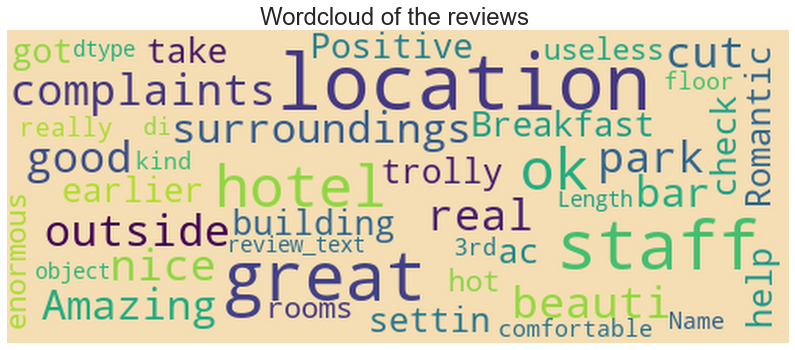

In [111]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='wheat', width = 500,\
                      height=200, max_font_size=50, max_words=50).generate(str(review_data_hotel_reviews["review_text"]))
wordcloud.recolor(random_state=700)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud,interpolation='lanczos')#interpolation of the image lanczos for a better quality image
plt.title("Wordcloud of the reviews ")
plt.axis("off")
plt.show()

In [121]:

english_stop_words = nltk.corpus.stopwords.words("english")


# Function to filter out the english stop words

In [128]:
def filtering_bag_of_words(words):
        return{word:1 for word in words 
        if not word in english_stop_words}

# Fetch all the negative reviews in a variable

In [123]:
all_negative_review = data_hotel_reviews.Negative_Review

# Tokenize all negative reviews into words from a column and store it in a variable

In [124]:
negative_words = []
for i in range(515738):
    negative_words.append(nltk.word_tokenize(all_negative_review.iloc[i]))

# Fetch all the positive reviews in a variable

In [72]:
all_positive_review=data_hotel_reviews.Positive_Review

# Tokenize all positive reviews into words from a column and store it in a variable

In [73]:
postive_words = []
for i in range(515738):
    postive_words.append(nltk.word_tokenize(all_positive_review.iloc[i]))

# Filtering all the english stop words from the positive and negative tokenized words and assigning the rest with a tag

In [129]:
featuring_positive_words = None
featuring_positive_words = [(filtering_bag_of_words(review),'positive')for review in postive_words]

NameError: name 'postive_words' is not defined

In [130]:
featuring_negative_words = None
featuring_negative_words = [(filtering_bag_of_words(review),'Negative')for review in negative_words]

In [76]:
from nltk.classify import NaiveBayesClassifier

# Taking 70% of the data for training, the 30% for validation

In [77]:

split = int(len(featuring_positive_words) * 0.7)
split

361016

# Naive Bayes Classification for sentiment analysis

In [78]:

classifier = NaiveBayesClassifier.train(featuring_positive_words[:split]+featuring_negative_words[:split])


# To check the accuracy of training set

In [80]:
training_accuracy = None 
training_accuracy = nltk.classify.util.accuracy(classifier, featuring_positive_words[:split] + featuring_negative_words[:split])*100
training_accuracy

93.57590799299754

# To check the accuracy of test set

In [81]:
test_accuracy = None 
test_accuracy = nltk.classify.util.accuracy(classifier, featuring_positive_words[split:] +featuring_negative_words[split:])*100
test_accuracy

92.61869675934904

# Classification of the words on the basis of positive and negative words

In [84]:
classifier.show_most_informative_features(40)

Most Informative Features
                Negative = 1              Negati : positi =  19613.9 : 1.0
                Positive = 1              positi : Negati =  16954.3 : 1.0
                   Comfy = 1              positi : Negati =    252.2 : 1.0
                Spacious = 1              positi : Negati =    201.5 : 1.0
                Friendly = 1              positi : Negati =    197.1 : 1.0
                 History = 1              positi : Negati =    151.7 : 1.0
               Brilliant = 1              positi : Negati =    150.8 : 1.0
                Charming = 1              positi : Negati =    141.7 : 1.0
                 Helpful = 1              positi : Negati =    139.9 : 1.0
              Convenient = 1              positi : Negati =    127.8 : 1.0
                 Stylish = 1              positi : Negati =    127.4 : 1.0
               Excellent = 1              positi : Negati =    124.1 : 1.0
               Fantastic = 1              positi : Negati =    122.5 : 1.0

In [36]:
train,test1 = train_test_split(review_data_hotel_reviews,test_size=0.7,random_state=50)
train1,test2 = train_test_split(test1,test_size=0.8,random_state=50)
print(train.shape);
print(test1.shape);
print(test2.shape);
print(train1.shape)

(154721, 6)
(361017, 6)
(288814, 6)
(72203, 6)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
t = TfidfVectorizer(max_features=10000)
train1_features = t.fit_transform(train['review_text'])
test1_features = t.transform(test1['review_text'])
test2 = t.transform(test2['review_text'])
train2_features=t.transform(train1['review_text'])

# Gradient Boosting Classification Model

In [39]:
gbdt = GradientBoostingRegressor(max_depth=5,learning_rate=0.1,n_estimators=150)
gbdt.fit(train1_features,train['Reviewer_Score'])
gbdt.fit(train2_features,train1['Reviewer_Score'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
prediction_primary = gbdt.predict(train1_features)
prediction_secondary=gbdt.predict(train2_features)

# Mean absolute error

In [43]:
MAE=mean_absolute_error(train['Reviewer_Score'],prediction_primary)
MAE_Secondary=mean_absolute_error(train1['Reviewer_Score'],prediction_secondary)

# Root Mean square error

In [44]:
RMSE=mean_squared_error(train['Reviewer_Score'],prediction_primary);
RMSE_Secondary=mean_absolute_error(train1['Reviewer_Score'],prediction_secondary)

In [45]:
RMSE

1.467929231568763

In [46]:
RMSE_Secondary

0.8871398875788814

In [47]:
MAE

0.921152459428519

In [48]:
MAE_Secondary

0.8871398875788814

[8.70818979e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


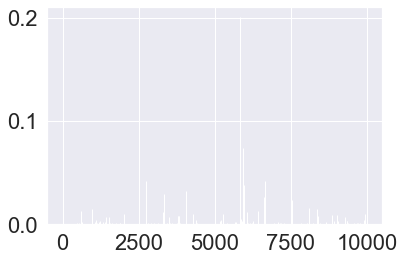

In [63]:
print(gbdt.feature_importances_)
plt.bar(range(len(gbdt.feature_importances_)), gbdt.feature_importances_)
plt.show()

# Classification of the words on the basis of positive and negative words

In [87]:
words = t.get_feature_names()
importance = gbdt.feature_importances_
dataframe = pd.DataFrame({'Word' : words,'Importance' : importance})
dataframe = dataframe.sort_values(['Importance', 'Word'], ascending=[0, 1])

dataframe.head(30)

,Word,Importance
5841,negative,0.200345
5915,no,0.073379
5944,not,0.055492
2748,dirty,0.041702
6647,positive,0.041587
5951,nothing,0.038042
4060,great,0.031832
3325,excellent,0.029634
6618,poor,0.026041
7536,rude,0.023338
